In [79]:
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt

etc = pd.read_csv('youtube_kpop1.csv',encoding='utf-8')
etc1 = pd.read_csv('youtube_kpop2.csv',encoding='utf-8')
etc2 = pd.read_csv('youtube_kpop3.csv',encoding='utf-8')

etc = pd.concat([etc, etc1])
etc = pd.concat([etc, etc2])

In [24]:
len(etc)

3989

NameError: name 'head' is not defined

In [40]:
etc2=list(etc.Comment)
etc2[0:3]

['진짜하루에한번씩본다',
 '난이때트와이스가너무좋음..지금트와이스가싫다는게아니라이노래들으면그때생각나고막..어쨌든이때컨셉잘잡았었고ㄹㅇ좋았음.그리고이때죠,챙너무예뻤어..',
 '딱봐도국민걸그룹그자체,,빨리코로나끝나서콘서트가고싶다ㅠㅠ']

In [41]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in etc2:
    clean = strip_punctuation(sent)
    clean_title.append(clean)
    
clean_title[0:3]

['진짜하루에한번씩본다',
 '난이때트와이스가너무좋음지금트와이스가싫다는게아니라이노래들으면그때생각나고막어쨌든이때컨셉잘잡았었고ㄹㅇ좋았음그리고이때죠챙너무예뻤어',
 '딱봐도국민걸그룹그자체빨리코로나끝나서콘서트가고싶다ㅠㅠ']

In [44]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

In [30]:
import time
import datetime
start = time.time()

In [62]:
dataset = []
for i in range(len(clean_title)):
    dataset.append(twitter_tag.nouns(re.sub('[^가-힣a-zA-Z\s]','',clean_title[i])))


sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times=times[0]
print(times)

<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-62-4f252f820ee0>:3: DeprecationWarning: invalid escape sequence \s
  dataset.append(twitter_tag.nouns(re.sub('[^가-힣a-zA-Z\s]','',clean_title[i])))


2:06:24


In [63]:
from gensim import corpora, models 
import gensim

In [64]:
high_score_reviews = dataset

In [65]:
high_score_reviews = [[y for y in x if not len(y)==1]
                       for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus=[dictionary.doc2bow(text) for text in high_score_reviews]

In [66]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = gensim.models.LdaModel(corpus,num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score_reviews,dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


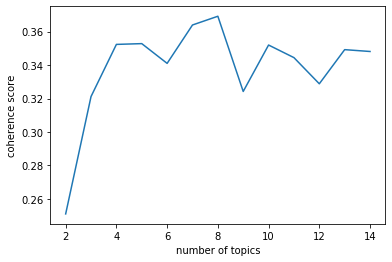

In [67]:
x = range(2,15)
plt.plot(x,coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [68]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,20):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

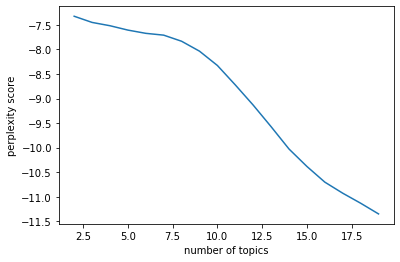

In [69]:
x=range(2,20)
plt.plot(x,perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [74]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=8,alpha=0.2,id2word = dictionary)

In [75]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.047*"진짜" + 0.037*"방탄" + 0.024*"정이" + 0.022*"파트" + 0.020*"입덕" + 0.017*"노래" + 0.011*"앞머리" + 0.011*"트와이스" + 0.011*"라이브" + 0.010*"이번" + 0.010*"무대" + 0.009*"우리" + 0.009*"단발" + 0.008*"언니" + 0.008*"생각" + 0.008*"응원" + 0.007*"멤버" + 0.007*"사랑" + 0.006*"보라" + 0.006*"편집"'),
 (1,
  '0.056*"노래" + 0.039*"마이걸" + 0.030*"머리" + 0.022*"목소리" + 0.021*"진짜" + 0.018*"보고" + 0.017*"트와이스" + 0.013*"핑크" + 0.011*"상큼" + 0.010*"찰떡" + 0.010*"소녀" + 0.009*"부분" + 0.008*"세계" + 0.008*"입덕" + 0.008*"느낌" + 0.008*"매력" + 0.008*"제일" + 0.007*"멤버" + 0.007*"정도" + 0.006*"사람"'),
 (2,
  '0.106*"살짝" + 0.025*"진짜" + 0.021*"오마이" + 0.015*"중독" + 0.013*"아이돌" + 0.011*"계속" + 0.010*"공주" + 0.010*"노래" + 0.009*"역시" + 0.008*"사랑" + 0.008*"영상" + 0.007*"미미" + 0.007*"무슨" + 0.007*"타팬" + 0.007*"썸네일" + 0.007*"트와이스" + 0.006*"친구" + 0.006*"음색" + 0.006*"승희" + 0.006*"댓글"'),
 (3,
  '0.049*"사랑" + 0.031*"진짜" + 0.024*"카메라" + 0.020*"컨셉" + 0.016*"노래" + 0.013*"사람" + 0.011*"처음" + 0.010*"방탄" + 0.010*"트와이스" + 0.009*"얼굴" + 0.009*"앞머리" + 0.009*"느낌" + 0.009*"정말" +

In [76]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,corpus,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.091934 -0.020492       1        1  16.373413
7     -0.013722  0.095122       2        1  15.341069
0      0.023110  0.080171       3        1  13.083279
3      0.026346  0.031441       4        1  12.270076
2     -0.167104 -0.026992       5        1  11.654607
4     -0.008536  0.039252       6        1  11.449708
5      0.064992 -0.085911       7        1  10.571651
6     -0.017019 -0.112591       8        1   9.256195, topic_info=     Term        Freq       Total Category  logprob  loglift
1801   살짝  220.000000  220.000000  Default  30.0000  30.0000
95    마이걸  278.000000  278.000000  Default  29.0000  29.0000
0      진짜  767.000000  767.000000  Default  28.0000  28.0000
73     사랑  196.000000  196.000000  Default  27.0000  27.0000
125    존나  109.000000  109.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
332    찰떡    8.487492   58.391319   Topic8  -5.2720   0.4513
281   아이돌    8.680903   76.047874   Topic8  -5.2495   0.2096
126    파트    8.719780  101.042572   Topic8  -5.2450  -0.0701
87     앨범    7.106967   27.649879   Topic8  -5.4495   1.0213
2747   유아    7.282226   49.039478   Topic8  -5.4252   0.4727

[548 rows x 6 columns], token_table=      Topic      Freq Term
term                      
2026      1  0.160250  가까이
2026      8  0.801251  가까이
293       3  0.182247   가사
293       4  0.546740   가사
293       7  0.242996   가사
...     ...       ...  ...
942       2  0.091945   흑발
942       3  0.643614   흑발
942       5  0.091945   흑발
954       5  0.552384   힐링
954       6  0.184128   힐링

[1116 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 1, 4, 3, 5, 6, 7])

In [73]:
kk = ldamodel.show_topic(7,topn=80000)
type(ldamodel.show_topic)
kk2=pd.DataFrame(kk)
kk2

,0,1
0,진짜,0.041819
1,입덕,0.036722
2,영상,0.024716
3,간지,0.018764
4,하루,0.013213
...,...,...
3972,어화,0.000080
3973,어택,0.000080
3974,비율,0.000080
3975,군가,0.000080
